In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [26]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [27]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1484 - accuracy: 0.9531 - val_loss: 0.0531 - val_accuracy: 0.9847
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0268 - val_accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0309 - val_accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0315 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0285 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0304 - val_accurac

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0310 - accuracy: 0.9917 - 648ms/epoch - 2ms/step
Test accuracy: 0.9916999936103821


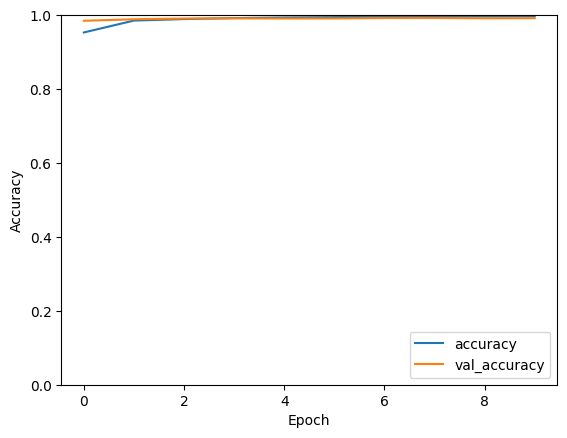

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()